## Chapter 7
### Decision Tree


In [ ]:
# Importing the libraries
import numpy as np
import sklearn,sklearn.tree
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.metrics as metrics
print(sklearn.__version__)

1.2.2


In [ ]:
# Importing the dataset
dataset = pd.read_csv('https://storage.googleapis.com/neurals/data/data/Social_Network_Ads.csv')
dataset = dataset.drop(columns=['User ID'])

In [ ]:
dataset.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [ ]:
enc = sklearn.preprocessing.OneHotEncoder()
enc.fit(dataset.iloc[:,[0]])
onehotlabels = enc.transform(dataset.iloc[:,[0]]).toarray()
genders = pd.DataFrame({'Female': onehotlabels[:, 0], 'Male': onehotlabels[:, 1]})
result = pd.concat([genders,dataset.iloc[:,1:]], axis=1, sort=False)
result.head(5)

,Female,Male,Age,EstimatedSalary,Purchased
0,0.0,1.0,19,19000,0
1,0.0,1.0,35,20000,0
2,1.0,0.0,26,43000,0
3,1.0,0.0,27,57000,0
4,0.0,1.0,19,76000,0


In [ ]:
y=result['Purchased']
X=result.drop(columns=['Purchased'])

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Fitting Decision Tree Classification to the Training set
classifier = sklearn.tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 100, max_depth=2)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=100)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 2, 30]])

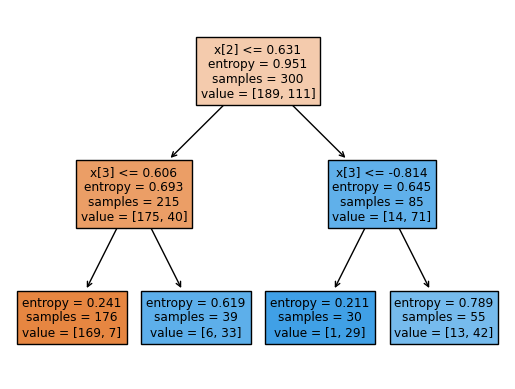

In [ ]:
sklearn.tree.plot_tree(classifier, filled=True)
plt.show()

In [ ]:
accuracy= metrics.accuracy_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
print(accuracy,recall,precision)

0.94 0.9375 0.8823529411764706
